# Proyek Analisis Data: Nama dataset
- Nama:Victoria Lucky Mahendra
- Email:victorlmahendra10@gmail.com
- Id Dicoding:vict_rlm

## Menentukan Pertanyaan Bisnis

- (pertanyaan 1)Bagaimana tren musiman penggunaan sepeda berubah sepanjang tahun? Apakah ada peningkatan penggunaan selama musim tertentu?
- (pertanyaan 2)Bagaimana pola penggunaan berbeda antara pengguna terdaftar dan pengguna kasual? Apakah ada perbedaan dalam perilaku mereka berdasarkan waktu dan cuaca?
- (pertanyaan 3) Apakah penggunaan sepeda berbeda antara hari kerja dan hari libur? Apakah ada tren khusus selama liburan?
- (pertanyaan 4) Adakah hubungan korelasi antara suhu,suhu merasa, kelembaban, kecepatan angin, dan jumlah sepeda yang disewa?




## Menyiapkan semua library yang dibuthkan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mno
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


- NumPy adalah pustaka Python yang digunakan untuk operasi numerik, seperti manipulasi array dan matriks.
- Pandas adalah pustaka Python yang digunakan untuk manipulasi dan analisis data, terutama dengan menggunakan struktur data seperti DataFrame.
- Matplotlib adalah pustaka untuk membuat visualisasi data dalam bentuk grafik dan plot.
- Seaborn adalah pustaka yang dibangun di atas Matplotlib dan digunakan untuk membuat plot yang lebih cantik dan informatif.
- Pustaka `missingno` digunakan untuk memvisualisasikan data yang hilang atau kosong dalam DataFrame.
- modul `drive` dari pustaka `google.colab`. Modul ini digunakan untuk menghubungkan dan mengakses Google Drive dari lingkungan Colab.
- drive.mount('/content/drive') digunakan untuk mengaitkan atau `mount` Google Drive Anda ke lingkungan Colab.

## Data Wrangling

### Gathering Data

tabel day dan tabel hour

In [ ]:
day = pd.read_csv('/content/drive/MyDrive/Dicoding/Bike-sharing-dataset/day.csv')
hour = pd.read_csv('/content/drive/MyDrive/Dicoding/Bike-sharing-dataset/hour.csv')

membaca dataset csv dari drive menggunakan pandas

In [ ]:
day

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [ ]:
hour

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


### Assessing Data

In [ ]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Setelah mengamati tabel "day", ditemukan bahwa ada masalah dalam tipe data pada kolom "dteday". Seharusnya, kolom ini menggunakan tipe data datetime, yang sesuai dengan sifat data yang menggambarkan tanggal (date).

In [ ]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Setelah mengamati tabel "hour", ditemukan bahwa ada masalah dalam tipe data pada kolom "dteday". Seharusnya, kolom ini menggunakan tipe data datetime, yang sesuai dengan sifat data yang menggambarkan tanggal (date).

**Cek Missing Value**

<Axes: >

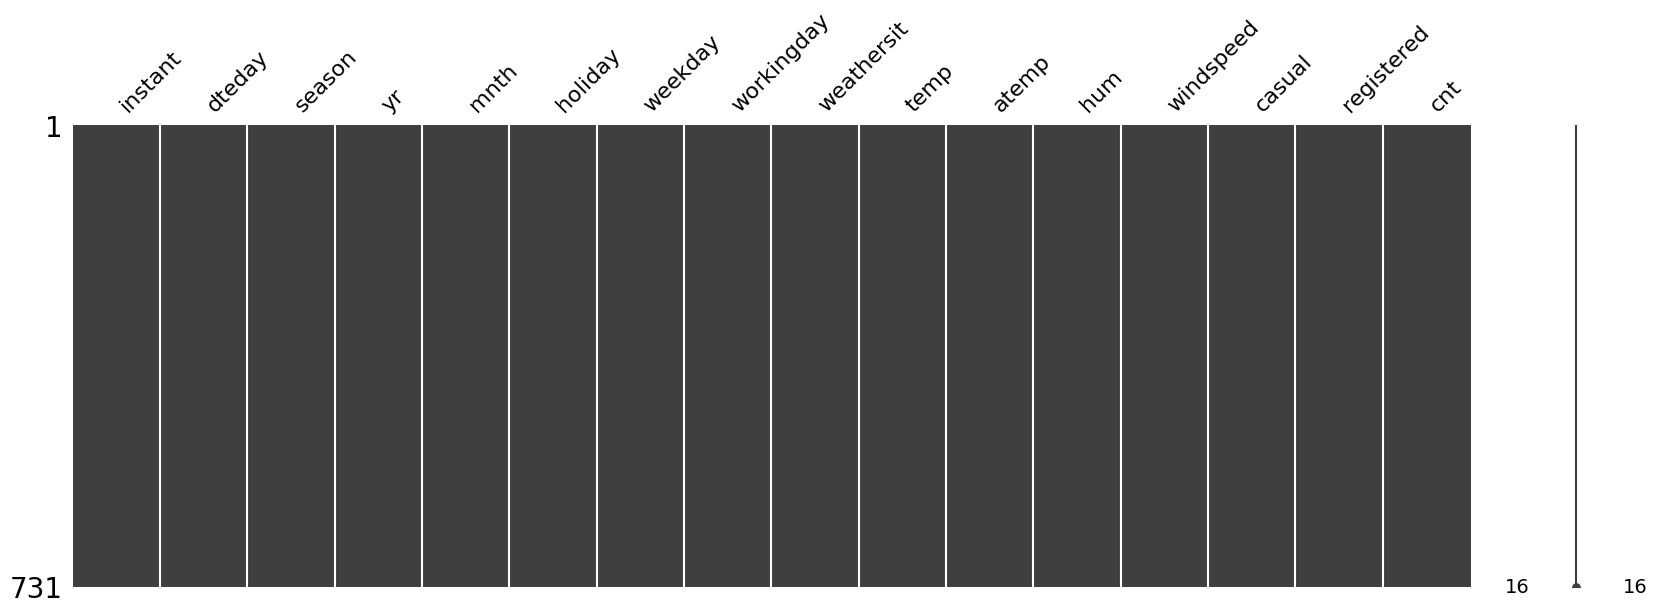

In [ ]:
mno.matrix(day, figsize = (20, 6))

<Axes: >

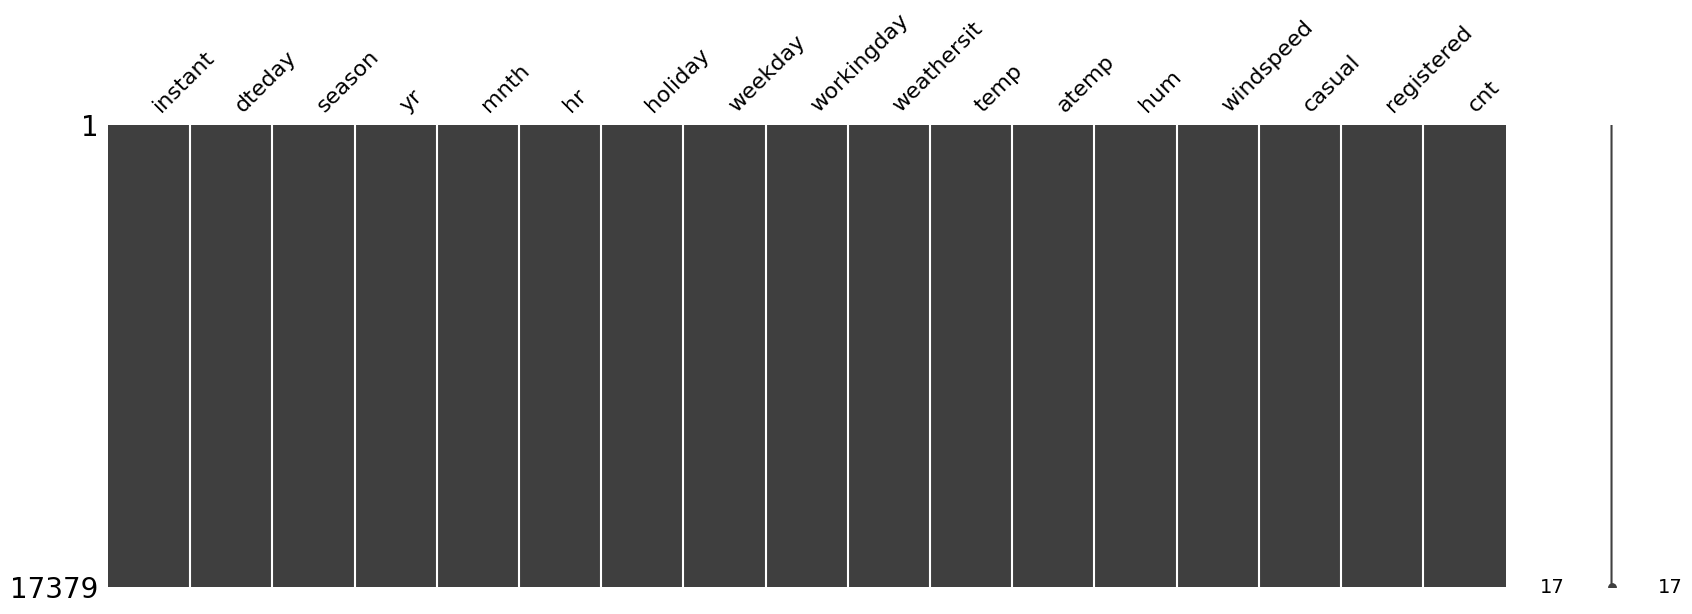

In [ ]:
mno.matrix(hour, figsize = (20, 6))

In [ ]:
day.isnull().sum()
#Jumlah data yang hilang

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
hour.isnull().sum()
#Jumlah data yang hilang

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Cek Duplikasi Data**

In [ ]:
day.duplicated().sum()

0

In [ ]:
hour.duplicated().sum()

0

**Melihat Parameter Statistik**

In [ ]:
day.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [ ]:
hour.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


# *Cleaning Data*

Memperbaiki tipe data

In [ ]:
day['dteday'] = pd.to_datetime(day['dteday'])

In [ ]:
hour['dteday'] = pd.to_datetime(hour['dteday'])

day/hour['dteday'] mengambil kolom 'dteday' dari DataFrame day/hour. Ini adalah langkah pertama untuk mengakses kolom yang akan diubah.

pd.to_datetime(...) adalah fungsi dari pustaka pandas (pd) yang digunakan untuk mengkonversi tipe data dari suatu objek ke tipe data datetime. Di dalam tanda kurung, Anda meletakkan objek atau kolom yang ingin diubah.

In [ ]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [ ]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

# **Exploratory Data Analysis (EDA)**

Denormalisasi data adalah proses mengembalikan data yang telah dinormalisasi sebelumnya ke dalam format atau skala aslinya. Normalisasi adalah teknik yang umum digunakan dalam analisis data untuk mengubah data ke dalam skala atau bentuk tertentu agar lebih mudah diolah, dibandingkan, atau diinterpretasikan.

In [ ]:
#berdasarkan yr : year (0: 2011, 1:2012)
day.loc[day["yr"] == 0, "yr"] = "2011"
day.loc[day["yr"] == 1, "yr"] = "2012"
hour.loc[hour["yr"] == 0, "yr"] = "2011"
hour.loc[hour["yr"] == 1, "yr"] = "2012"
jumlah_yr = day["yr"].value_counts().sort_index()

- Mengubah nilai dalam kolom "yr" yang sama dengan 0 menjadi "2011".
- Mengubah nilai dalam kolom "yr" yang sama dengan 1 menjadi "2012".
- Menghitung jumlah kemunculan setiap nilai dalam kolom "yr" dan mengurutkannya berdasarkan indeks. Hasilnya disimpan dalam variabel yr_counts.

In [ ]:
jumlah_yr

2011    365
2012    366
Name: yr, dtype: int64

In [ ]:
day["mnth"] = day["mnth"].replace({
    1: "January",
    2: "February",
    3: "March",
    4: "April",
    5: "May",
    6: "June",
    7: "July",
    8: "August",
    9: "September",
    10: "October",
    11: "November",
    12: "December"
})

hour["mnth"] = hour["mnth"].replace({
    1: "January",
    2: "February",
    3: "March",
    4: "April",
    5: "May",
    6: "June",
    7: "July",
    8: "August",
    9: "September",
    10: "October",
    11: "November",
    12: "December"
})
jumlah_bulan = day["mnth"].value_counts().reindex([
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
], fill_value=0)

In [ ]:
jumlah_bulan

January      62
February     57
March        62
April        60
May          62
June         60
July         62
August       62
September    60
October      62
November     60
December     62
Name: mnth, dtype: int64

In [ ]:
jumlah_jam = hour["hr"].value_counts().sort_index()
jumlah_jam

0     726
1     724
2     715
3     697
4     697
5     717
6     725
7     727
8     727
9     727
10    727
11    727
12    728
13    729
14    729
15    729
16    730
17    730
18    728
19    728
20    728
21    728
22    728
23    728
Name: hr, dtype: int64

In [ ]:
#berdasarkan season : season (1:springer, 2:summer, 3:fall, 4:winter)
day["season"] = day["season"].replace({
    1: "Springer",
    2: "Summer",
    3: "Fall",
    4: "Winter"
})

hour["season"] = hour["season"].replace({
    1: "Springer",
    2: "Summer",
    3: "Fall",
    4: "Winter"
})

jumlah_season = day["season"].value_counts().sort_index()

In [ ]:
jumlah_season

Fall        188
Springer    181
Summer      184
Winter      178
Name: season, dtype: int64

In [ ]:
#berdasarkan holiday : weather day is holiday or not
day.loc[day["holiday"] == 0, "holiday"] = "holiday"
day.loc[day["holiday"] == 1, "holiday"] = "not a holiday"
hour.loc[hour["holiday"] == 0, "holiday"] = "holiday"
hour.loc[hour["holiday"] == 1, "holiday"] = "not a holiday"

jumlah_holiday = day["holiday"].value_counts().sort_index()

In [ ]:
jumlah_holiday

holiday          710
not a holiday     21
Name: holiday, dtype: int64

berdasarkan karakteristik data:
- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)

maka perlu adanya normalisasi pada tabel day maupun hour

In [ ]:
day["temp"] *= 41
day["atemp"] *= 50
day["hum"] *= 100
day["windspeed"] *= 67

In [ ]:
hour["temp"] *= 41
hour["atemp"] *= 50
hour["hum"] *= 100
hour["windspeed"] *= 67

berdasarkan karakteristik data :
weathersit :
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

maka perlu adanya normalisasi pada tabel day/hour

In [ ]:
day["weathersit"] = day["weathersit"].replace({
    1: "Clear, Few clouds, Partly cloudy, Partly cloudy",
    2: "Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist",
    3: "Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds",
    4: "Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog"
})


In [ ]:
hour["weathersit"] = hour["weathersit"].replace({
    1: "Clear, Few clouds, Partly cloudy, Partly cloudy",
    2: "Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist",
    3: "Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds",
    4: "Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog"
})


In [ ]:
day["weekday"] = day["weekday"].replace({
    0: "Sunday",
    1: "Monday",
    2: "Tuesday",
    3: "Wednesday",
    4: "Thursday",
    5: "Friday",
    6: "Saturday"
})
jumlah_weekday = day.weekday.value_counts().sort_index()

In [ ]:
jumlah_weekday

Friday       104
Monday       105
Saturday     105
Sunday       105
Thursday     104
Tuesday      104
Wednesday    104
Name: weekday, dtype: int64

In [ ]:
hour["weekday"] = hour["weekday"].replace({
    0: "Sunday",
    1: "Monday",
    2: "Tuesday",
    3: "Wednesday",
    4: "Thursday",
    5: "Friday",
    6: "Saturday"
})

In [ ]:
#berdasarkan workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
day.loc[day["workingday"] == 0, "workingday"] = "Holiday"
day.loc[day["workingday"] == 1, "workingday"] = "Working Day"
hour.loc[hour["workingday"] == 0, "workingday"] = "Holiday"
hour.loc[hour["workingday"] == 1, "workingday"] = "Working Day"

jumlah_workingday = day.workingday.value_counts().sort_index()

In [ ]:
day

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Springer,2011,January,holiday,Saturday,Holiday,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2011-01-02,Springer,2011,January,holiday,Sunday,Holiday,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2011-01-03,Springer,2011,January,holiday,Monday,Working Day,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2011-01-04,Springer,2011,January,holiday,Tuesday,Working Day,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2011-01-05,Springer,2011,January,holiday,Wednesday,Working Day,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,Springer,2012,December,holiday,Thursday,Working Day,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",10.420847,11.33210,65.2917,23.458911,247,1867,2114
727,728,2012-12-28,Springer,2012,December,holiday,Friday,Working Day,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",10.386653,12.75230,59.0000,10.416557,644,2451,3095
728,729,2012-12-29,Springer,2012,December,holiday,Saturday,Holiday,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",10.386653,12.12000,75.2917,8.333661,159,1182,1341
729,730,2012-12-30,Springer,2012,December,holiday,Sunday,Holiday,"Clear, Few clouds, Partly cloudy, Partly cloudy",10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [ ]:
jumlah_per_workingday = day.groupby('workingday')['cnt'].sum().reset_index()
jumlah_per_workingday

,workingday,cnt
0,Holiday,1000269
1,Working Day,2292410


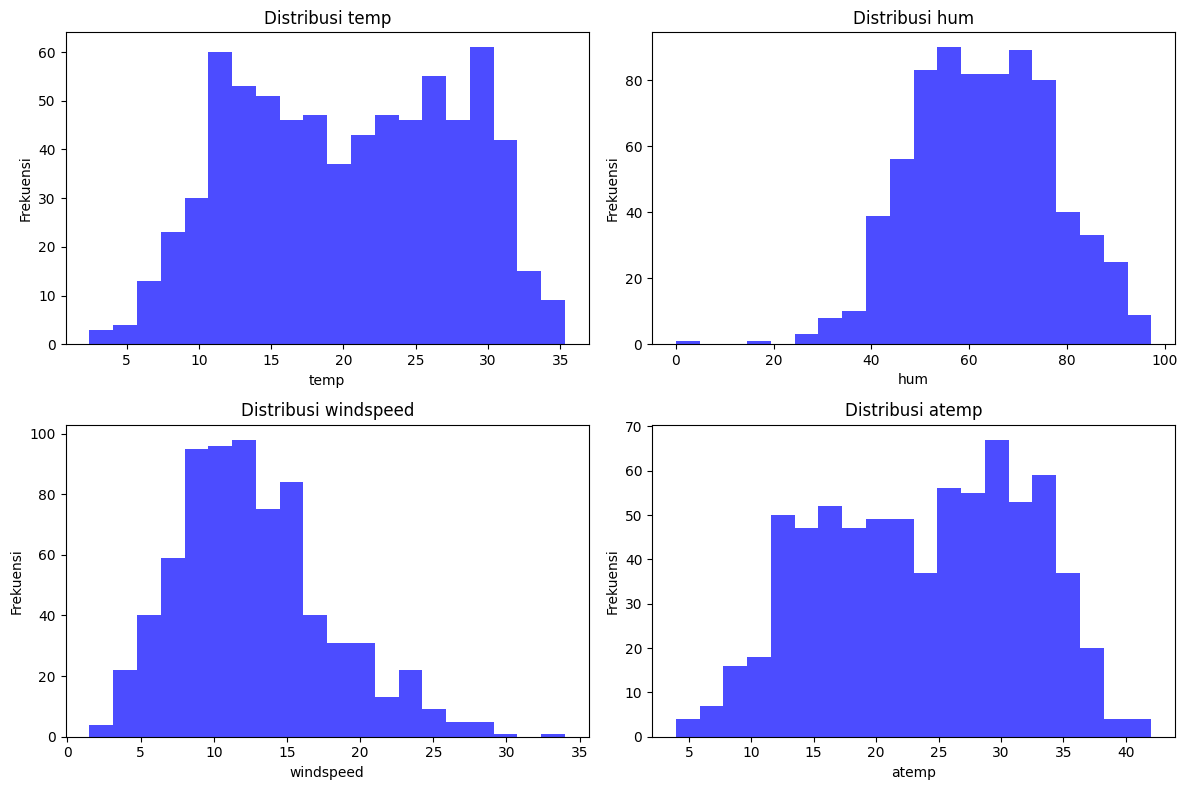

In [ ]:
fitur = ['temp', 'hum', 'windspeed', 'atemp']

# Mengatur ukuran subplot sesuai dengan jumlah fitur
plt.figure(figsize=(12, 8))

# Loop melalui setiap fitur dan membuat histogram
for i, kolom in enumerate(fitur, 1):
    plt.subplot(2, 2, i)
    plt.hist(day[kolom], bins=20, color='blue', alpha=0.7)
    plt.title(f'Distribusi {kolom}')
    plt.xlabel(kolom)
    plt.ylabel('Frekuensi')

# Menampilkan plot
plt.tight_layout()
plt.show()


Hasil pengamatan pada tabel `day` mengindikasikan bahwa distribusi data dalam kolom `temp` dan `atemp` pada grafik histogramnya memiliki kecenderungan miring ke kiri atau "left-skewed distribution." Sebaliknya, kolom `hum` dan `windspeed` menunjukkan grafik histogram yang memiliki kecenderungan miring ke kanan atau "right-skewed distribution."

Kesimpulan dari hasil ini adalah sebagai berikut:

- Kolom temp dan atemp memiliki mayoritas data yang cenderung rendah, dengan ekstremum di sebelah kiri distribusi.
- Kolom hum memiliki mayoritas data yang cenderung tinggi, dengan ekstremum di sebelah kanan distribusi.
- Kolom windspeed juga memiliki mayoritas data yang cenderung tinggi, dengan ekstremum di sebelah kanan distribusi.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren musiman penggunaan sepeda berubah sepanjang tahun? Apakah ada peningkatan penggunaan selama musim tertentu?

In [ ]:
# Menggunakan groupby untuk menghitung jumlah cnt berdasarkan musim dan tahun
jumlah_per_musim = day.groupby(['yr', 'season'])['cnt'].sum().reset_index()
jumlah_per_musim

,yr,season,cnt
0,2011,Fall,419650
1,2011,Springer,150000
2,2011,Summer,347316
3,2011,Winter,326137
4,2012,Fall,641479
5,2012,Springer,321348
6,2012,Summer,571273
7,2012,Winter,515476


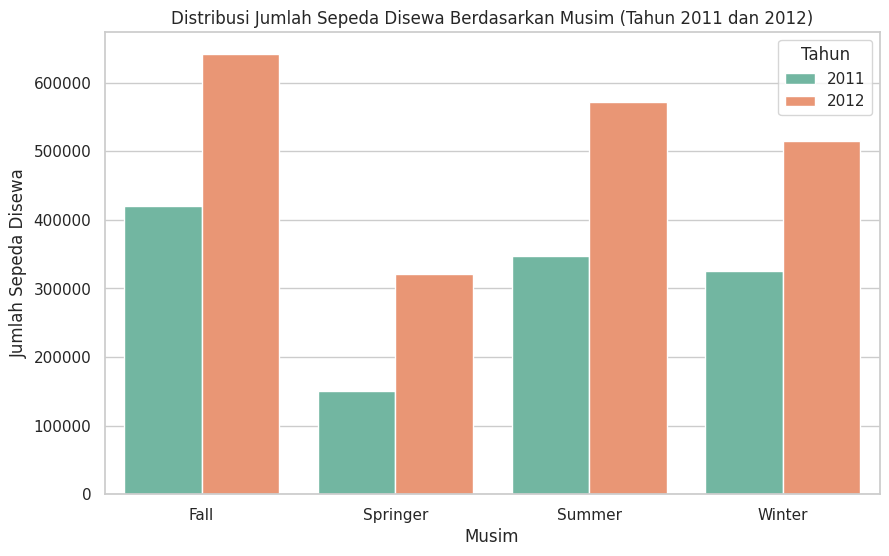

In [ ]:
# Mengatur gaya visualisasi menggunakan Seaborn
sns.set(style="whitegrid")

# Membuat box plot dengan warna berbeda untuk setiap tahun
plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='cnt', hue='yr', data=jumlah_per_musim, palette="Set2")

# Menambahkan label sumbu x dan y
plt.xlabel('Musim')
plt.ylabel('Jumlah Sepeda Disewa')

# Memberikan judul plot
plt.title('Distribusi Jumlah Sepeda Disewa Berdasarkan Musim (Tahun 2011 dan 2012)')

# Menampilkan legenda (informasi tentang warna yang merepresentasikan tahun)
plt.legend(title='Tahun', loc='upper right')

# Menampilkan plot
plt.show()

### Pertanyaan 2: Bagaimana pola penggunaan berbeda antara pengguna terdaftar dan pengguna kasual? Apakah ada perbedaan dalam perilaku mereka berdasarkan waktu dan cuaca?

**Cuaca**

In [ ]:
jumlah_per_cuaca = day.groupby('weathersit')['casual','registered'].sum().reset_index()
jumlah_per_cuaca

<ipython-input-41-dfe30386a7a4>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  jumlah_per_cuaca = day.groupby('weathersit')['casual','registered'].sum().reset_index()


,weathersit,casual,registered
0,"Clear, Few clouds, Partly cloudy, Partly cloudy",446346,1811606
1,"Light Snow, Light Rain + Thunderstorm + Scatte...",3895,33974
2,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",169776,827082


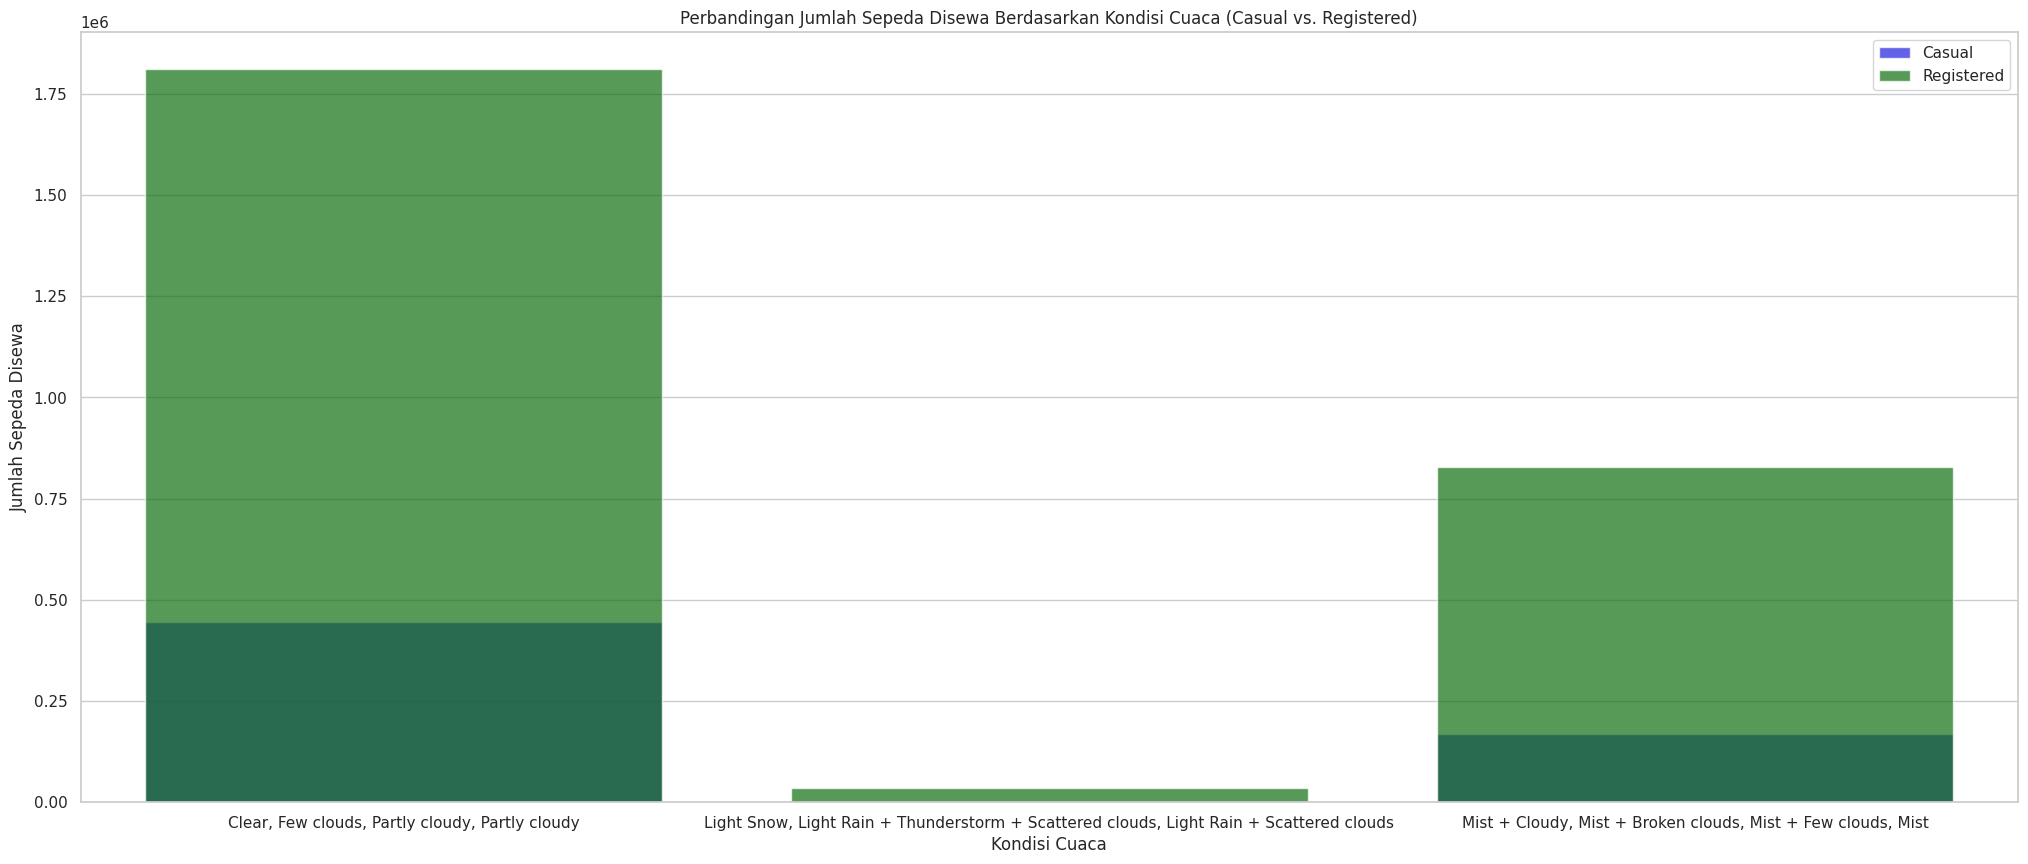

In [ ]:
# Membuat plot bar menggunakan Seaborn
plt.figure(figsize=(25, 10))
sns.barplot(x='weathersit', y='casual', data=jumlah_per_cuaca, label='Casual', color='blue', alpha=0.7)
sns.barplot(x='weathersit', y='registered', data=jumlah_per_cuaca, label='Registered', color='green', alpha=0.7)

# Menambahkan label sumbu x dan y
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Sepeda Disewa')
plt.legend()

# Memberikan judul plot
plt.title('Perbandingan Jumlah Sepeda Disewa Berdasarkan Kondisi Cuaca (Casual vs. Registered)')

# Menampilkan plot
plt.show()

**Jam**

In [ ]:
jumlah_per_hr = hour.groupby('hr')['casual','registered'].sum().reset_index()
jumlah_per_hr

<ipython-input-43-d8190c32e518>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  jumlah_per_hr = hour.groupby('hr')['casual','registered'].sum().reset_index()


,hr,casual,registered
0,0,7375,31755
1,1,4709,19455
2,2,3412,12940
3,3,1893,6281
4,4,874,3554
5,5,1012,13249
6,6,3017,52115
7,7,8037,146134
8,8,15761,245240
9,9,22458,136980


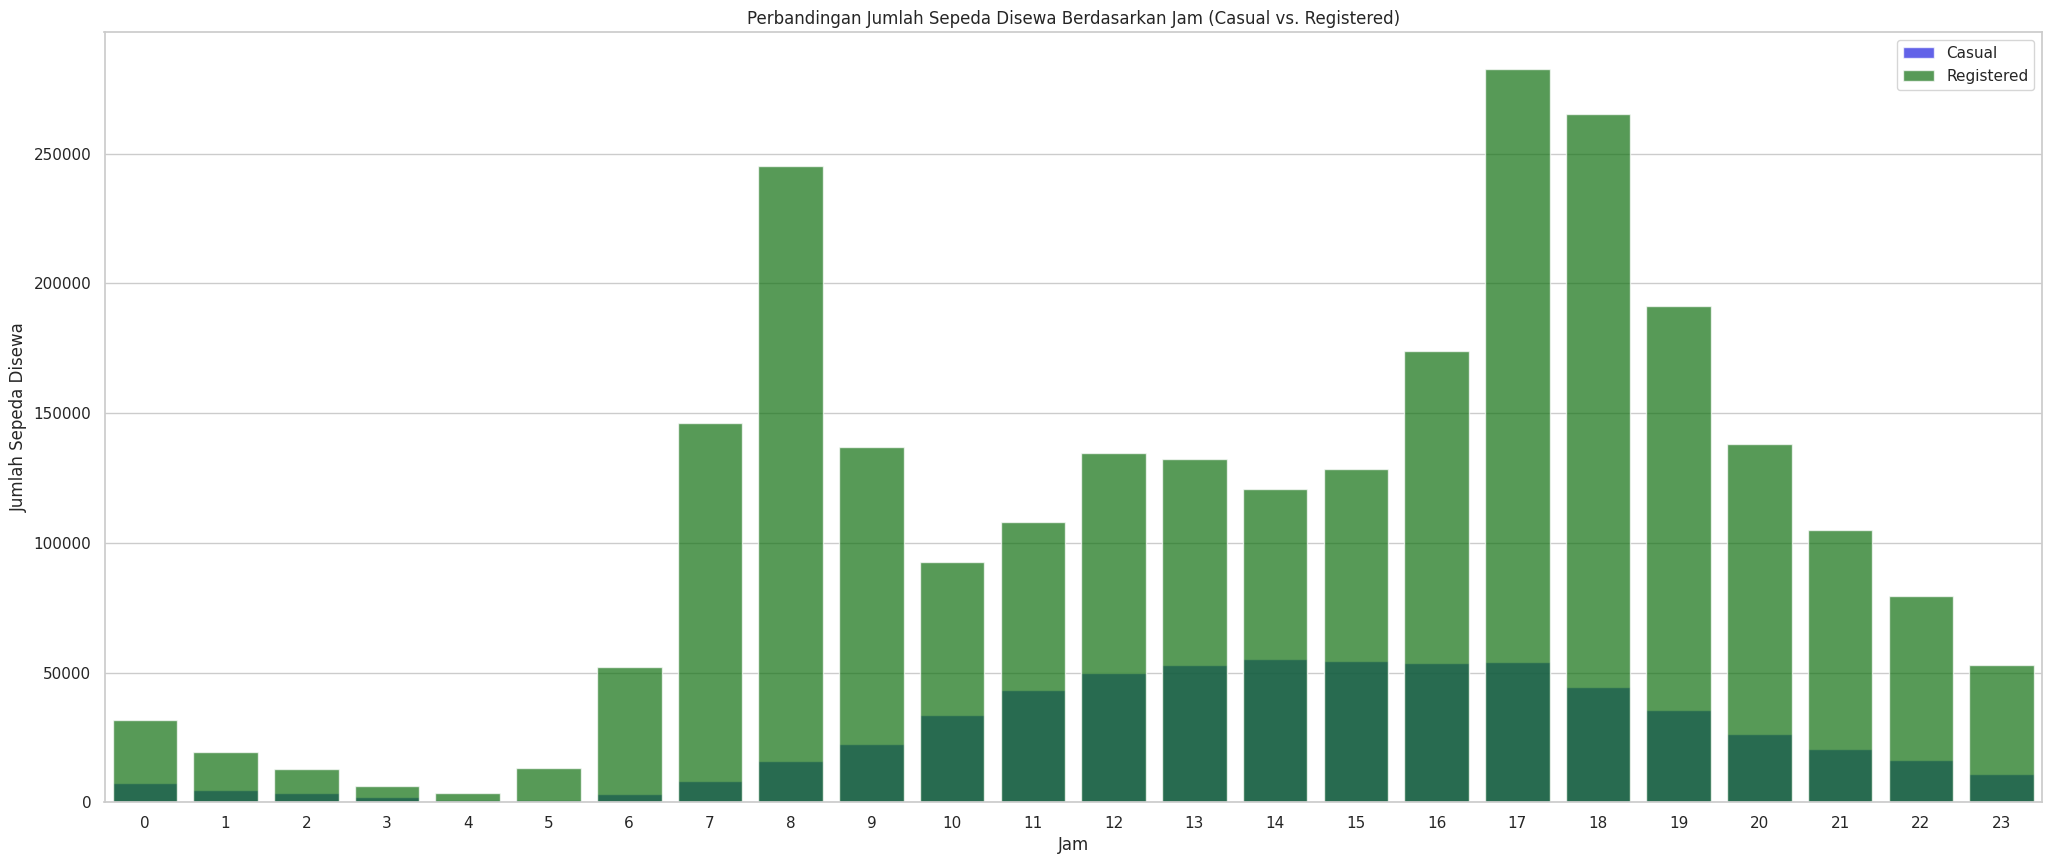

In [ ]:
# Membuat plot bar menggunakan Seaborn
plt.figure(figsize=(25, 10))
sns.barplot(x='hr', y='casual', data=jumlah_per_hr, label='Casual', color='blue', alpha=0.7)
sns.barplot(x='hr', y='registered', data=jumlah_per_hr, label='Registered', color='green', alpha=0.7)

# Menambahkan label sumbu x dan y
plt.xlabel('Jam')
plt.ylabel('Jumlah Sepeda Disewa')
plt.legend()

# Memberikan judul plot
plt.title('Perbandingan Jumlah Sepeda Disewa Berdasarkan Jam (Casual vs. Registered)')

# Menampilkan plot
plt.show()


**HARI**

In [ ]:
jumlah_per_day = day.groupby('weekday')['casual','registered'].sum().reset_index()
jumlah_per_day

<ipython-input-45-439afdbf4dd1>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  jumlah_per_day = day.groupby('weekday')['casual','registered'].sum().reset_index()


,weekday,casual,registered
0,Friday,78238,409552
1,Monday,70784,384719
2,Saturday,153852,323955
3,Sunday,140521,303506
4,Thursday,61460,423935
5,Tuesday,57843,411266
6,Wednesday,57319,415729


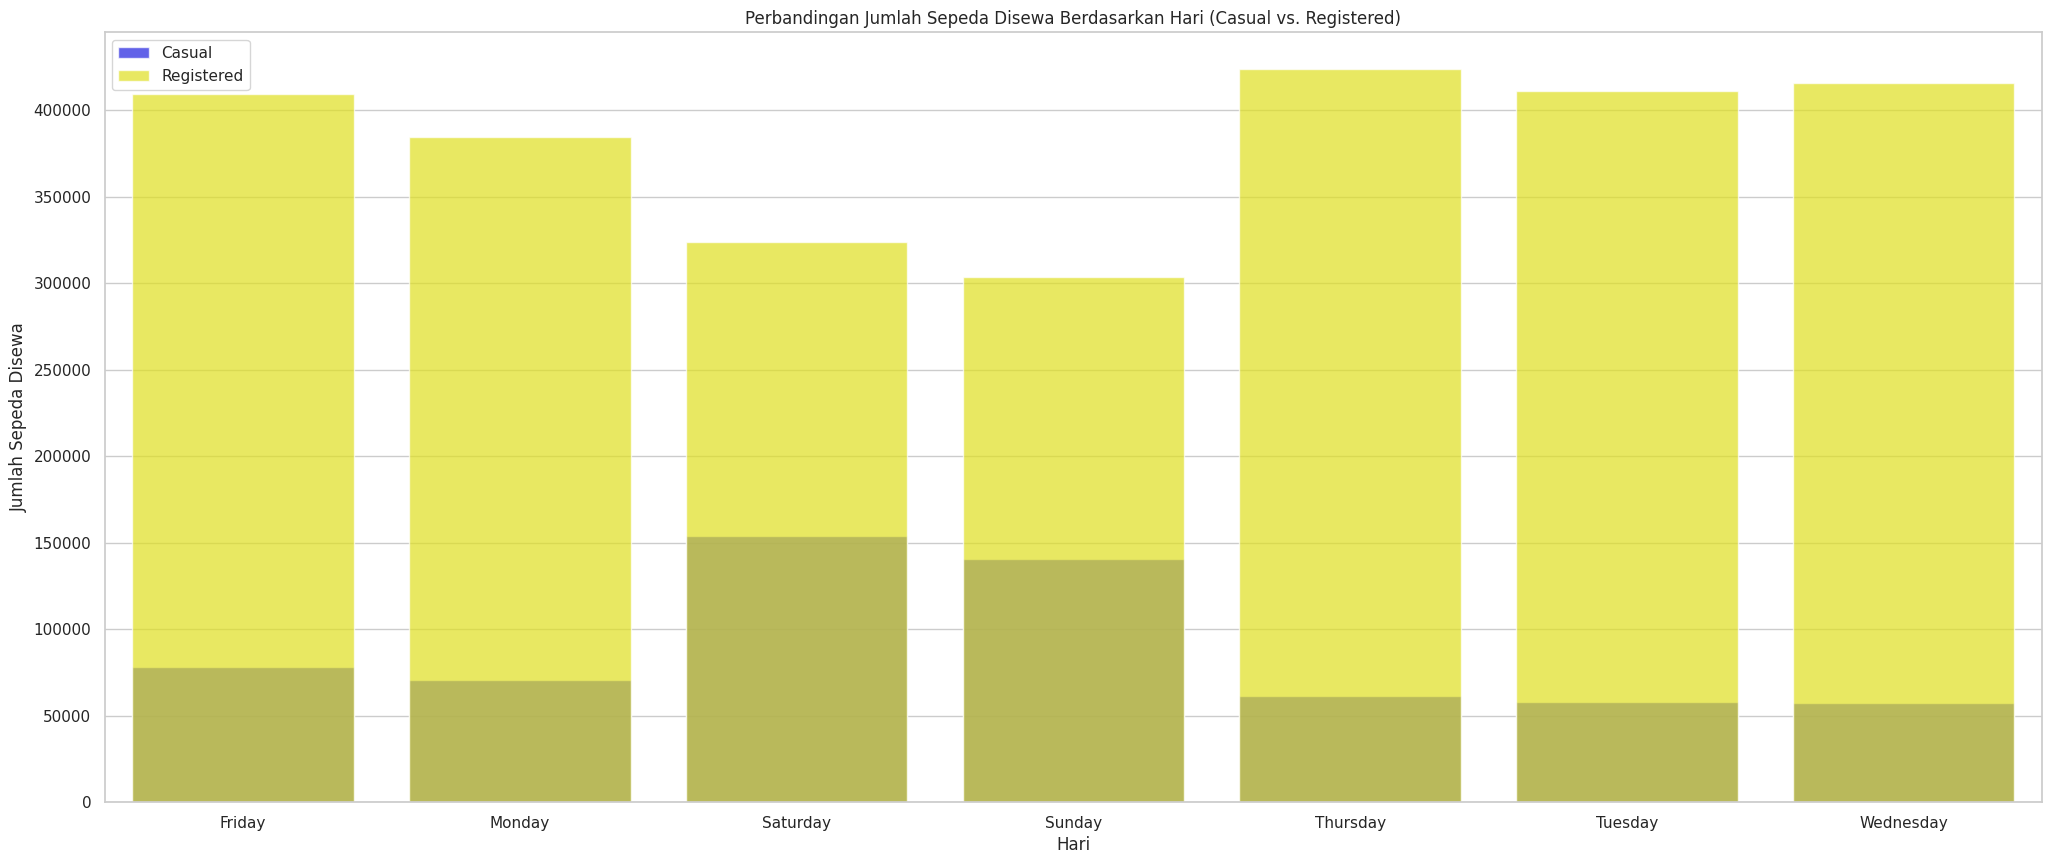

In [ ]:
# Membuat plot bar menggunakan Seaborn
plt.figure(figsize=(25, 10))
sns.barplot(x='weekday', y='casual', data=jumlah_per_day, label='Casual', color='blue', alpha=0.7)
sns.barplot(x='weekday', y='registered', data=jumlah_per_day, label='Registered', color='yellow', alpha=0.7)

# Menambahkan label sumbu x dan y
plt.xlabel('Hari')
plt.ylabel('Jumlah Sepeda Disewa')
plt.legend()

# Memberikan judul plot
plt.title('Perbandingan Jumlah Sepeda Disewa Berdasarkan Hari (Casual vs. Registered)')

# Menampilkan plot
plt.show()


**BULAN**

In [ ]:
jumlah_per_month = day.groupby('mnth')['casual','registered'].sum().reset_index()
jumlah_per_month

<ipython-input-47-7c13eb9220a6>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  jumlah_per_month = day.groupby('mnth')['casual','registered'].sum().reset_index()


,mnth,casual,registered
0,April,60802,208292
1,August,72039,279155
2,December,21693,189343
3,February,14963,136389
4,January,12042,122891
5,July,78157,266791
6,June,73906,272436
7,March,44444,184476
8,May,75285,256401
9,November,36603,218228


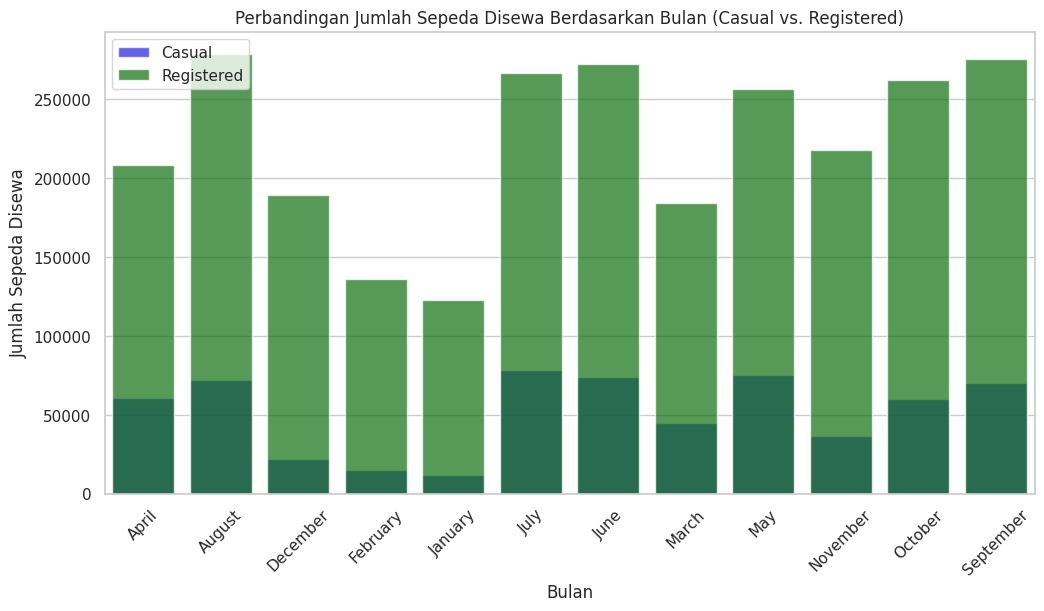

In [ ]:
# Mengatur gaya visualisasi menggunakan Seaborn
sns.set(style="whitegrid")

# Membuat bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='mnth', y='casual', data=jumlah_per_month, label='Casual', color='blue', alpha=0.7)
sns.barplot(x='mnth', y='registered', data=jumlah_per_month, label='Registered', color='green', alpha=0.7)

# Menambahkan label sumbu x dan y
plt.xlabel('Bulan')
plt.ylabel('Jumlah Sepeda Disewa')
plt.legend()

# Memberikan judul plot
plt.title('Perbandingan Jumlah Sepeda Disewa Berdasarkan Bulan (Casual vs. Registered)')

# Menampilkan plot
plt.xticks(rotation=45)
plt.show()

### Pertanyaan 3:Apakah penggunaan sepeda berbeda antara hari kerja dan hari libur? Apakah ada tren khusus selama liburan?

In [ ]:
jumlah_per_libur = day.groupby(['workingday', 'weekday'])['cnt'].sum().reset_index()
jumlah_per_libur

,workingday,weekday,cnt
0,Holiday,Friday,6494
1,Holiday,Monday,59605
2,Holiday,Saturday,477807
3,Holiday,Sunday,444027
4,Holiday,Thursday,3920
5,Holiday,Tuesday,1013
6,Holiday,Wednesday,7403
7,Working Day,Friday,481296
8,Working Day,Monday,395898
9,Working Day,Thursday,481475


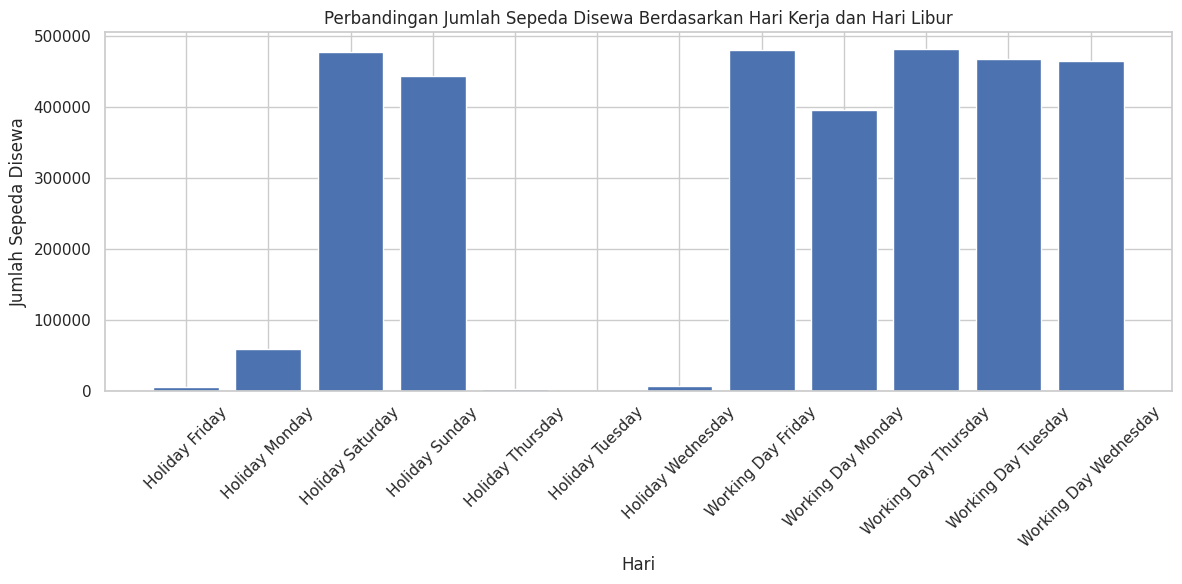

In [ ]:
# Membuat plot bar menggunakan Matplotlib
plt.figure(figsize=(12, 6))
plt.bar(jumlah_per_libur['workingday'] + ' ' + jumlah_per_libur['weekday'], jumlah_per_libur['cnt'])
plt.xlabel('Hari')
plt.ylabel('Jumlah Sepeda Disewa')
plt.title('Perbandingan Jumlah Sepeda Disewa Berdasarkan Hari Kerja dan Hari Libur')

# Menampilkan plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Pertanyaan 4:Adakah hubungan korelasi antara suhu,suhu merasa, kelembaban, kecepatan angin, dan jumlah sepeda yang disewa?

In [ ]:
# Menghitung korelasi menggunakan metode Pearson
correlation_matrix = day[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr(method='pearson')
correlation_matrix

,temp,atemp,hum,windspeed,cnt
temp,1.000000,0.991702,0.126963,-0.157944,0.627494
atemp,0.991702,1.000000,0.139988,-0.183643,0.631066
hum,0.126963,0.139988,1.000000,-0.248489,-0.100659
windspeed,-0.157944,-0.183643,-0.248489,1.000000,-0.234545
cnt,0.627494,0.631066,-0.100659,-0.234545,1.000000


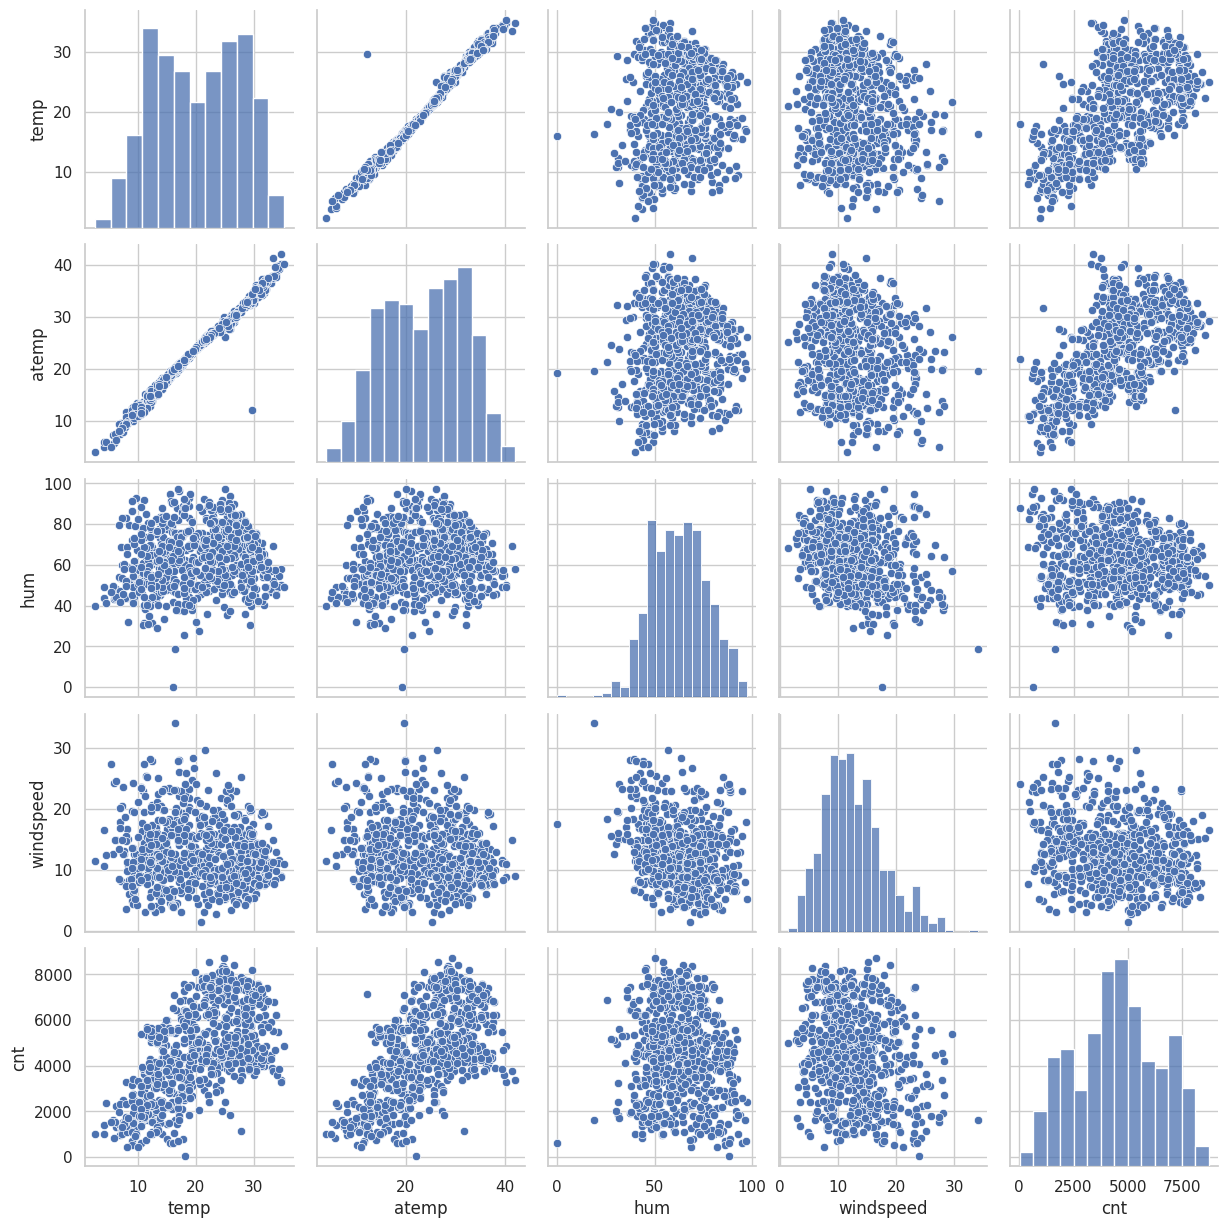

In [ ]:
# Memilih fitur yang akan digunakan untuk pair plot
features = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

# Membuat pair plot
sns.pairplot(day[features])
plt.show()

## Conclusion

- Conclution pertanyaan 1

Dari data jumlah sepeda yang disewa (`cnt`) per musim dan tahun, dapat diambil beberapa kesimpulan:

1. Tren Umum: Jumlah sepeda yang disewa cenderung meningkat dari tahun 2011 ke tahun 2012. Hal ini terlihat dari fakta bahwa jumlah sepeda yang disewa pada tahun 2012 lebih tinggi daripada tahun 2011 di semua musim.

2. Musim yang Paling Populer: Musim Fall pada tahun 2012 merupakan musim yang paling populer dengan jumlah sepeda yang disewa mencapai 641,479, diikuti oleh musim Summer pada tahun yang sama dengan 571,273.

3. Musim yang Kurang Populer: Musim Springer pada tahun 2011 merupakan musim yang paling kurang populer dengan jumlah sepeda yang disewa hanya 150,000.

4. Varian Musiman: Tren musiman dalam penggunaan sepeda sangat jelas terlihat. Musim Summer dan Fall cenderung menjadi musim yang lebih populer untuk bersepeda, sementara musim Springer dan Winter cenderung memiliki jumlah sepeda yang disewa yang lebih rendah.

5. Potensi Pertumbuhan: Tren peningkatan penggunaan sepeda dari tahun ke tahun menunjukkan potensi pertumbuhan dalam penyewaan sepeda, dan dapat menjadi fokus untuk meningkatkan layanan atau promosi berdasarkan musim tertentu.


- conclution pertanyaan 2

**CUACA**

terdapat perbandingan antara pengguna sepeda kasual `casual` dan pengguna sepeda terdaftar `registered` berdasarkan kondisi cuaca `weathersit`. Berikut adalah beberapa konklusi yang dapat diambil dari tabel ini:

1. **Kondisi Cuaca Cerah (Clear, Few clouds, Partly cloudy, Partly cloudy)**:
   - Pengguna Sepeda Kasual: 446,346
   - Pengguna Sepeda Terdaftar: 1,811,606

   Pada kondisi cuaca cerah, jumlah pengguna sepeda kasual lebih rendah dibandingkan dengan pengguna sepeda terdaftar. Pengguna terdaftar memiliki kontribusi yang lebih besar dalam kondisi cuaca ini.

2. **Hujan Ringan dan Badai (Light Snow, Light Rain + Thunderstorm + Scattered Clouds, dll.)**:
   - Pengguna Sepeda Kasual: 3,895
   - Pengguna Sepeda Terdaftar: 33,974

   Pada kondisi cuaca buruk seperti hujan ringan atau badai, pengguna sepeda kasual tetap memiliki kontribusi yang lebih rendah dibandingkan dengan pengguna sepeda terdaftar.

3. **Kabut dan Awan (Mist + Cloudy, Mist + Broken Clouds, dll.)**:
   - Pengguna Sepeda Kasual: 169,776
   - Pengguna Sepeda Terdaftar: 827,082

   Kondisi cuaca berkabut dan berawan juga menunjukkan bahwa pengguna sepeda terdaftar memiliki kontribusi yang lebih besar daripada pengguna sepeda kasual.

Dengan demikian, terlihat bahwa pengguna sepeda terdaftar memiliki kontribusi yang signifikan dalam semua kondisi cuaca yang terdaftar dalam tabel, sedangkan pengguna sepeda kasual cenderung memiliki kontribusi yang lebih rendah dalam semua kondisi cuaca tersebut. Kontribusi pengguna sepeda terdaftar mungkin lebih stabil terlepas dari kondisi cuaca, sementara pengguna sepeda kasual lebih dipengaruhi oleh kondisi cuaca yang lebih baik.

===============================================================================================================

**JAM**

terdapat perbandingan antara jumlah pengguna sepeda kasual `casual` dan pengguna sepeda terdaftar `registered` berdasarkan jam dalam sehari `hr`. Berikut adalah beberapa konklusi yang dapat diambil dari tabel ini:

1. **Jam Puncak Pagi (7:00 - 9:00)**:
   - Pengguna Sepeda Kasual: Jumlah pengguna kasual meningkat secara signifikan selama jam-jam ini, mencapai puncak tertinggi pada jam 8 pagi.
   - Pengguna Sepeda Terdaftar: Pengguna terdaftar juga mengalami peningkatan, tetapi tidak sebesar pengguna kasual.

2. **Jam Siang (10:00 - 16:00)**:
   - Pengguna Sepeda Kasual: Jumlah pengguna kasual terus meningkat selama jam siang dan mencapai puncaknya pada jam 2 siang.
   - Pengguna Sepeda Terdaftar: Pengguna terdaftar juga mengalami peningkatan selama jam siang, tetapi tidak sebesar pengguna kasual.

3. **Jam Puncak Sore (17:00 - 18:00)**:
   - Pengguna Sepeda Kasual: Pengguna kasual mengalami peningkatan signifikan menjelang sore, mencapai puncak tertinggi pada jam 6 sore.
   - Pengguna Sepeda Terdaftar: Pengguna terdaftar juga mengalami peningkatan, tetapi jumlahnya lebih tinggi dibandingkan dengan pengguna kasual selama jam ini.

4. **Jam Malam (19:00 - 22:00)**:
   - Pengguna Sepeda Kasual: Jumlah pengguna kasual mulai menurun setelah jam 6 sore, tetapi masih cukup signifikan hingga pukul 10 malam.
   - Pengguna Sepeda Terdaftar: Pengguna terdaftar juga mengalami penurunan setelah jam 6 sore, tetapi tetap lebih tinggi daripada pengguna kasual hingga larut malam.

5. **Malam dan Pagi Hari (0:00 - 6:00)**:
   - Selama malam dan pagi hari, baik pengguna kasual maupun pengguna terdaftar memiliki jumlah yang lebih rendah dibandingkan dengan jam-jam sibuk dalam sehari.

Dengan demikian, terlihat bahwa pola penggunaan sepeda berbeda antara pengguna kasual dan terdaftar, dengan pengguna kasual lebih aktif pada jam-jam sibuk di pagi, siang, dan sore hari, sedangkan pengguna terdaftar cenderung lebih stabil sepanjang hari, dengan puncak pada jam-jam sibuk dan jumlah yang lebih tinggi pada sore dan malam hari.

===============================================================================================================

**HARI**
Terdapat perbandingan antara casual dan registered berdasarkan weekday

1. Hari Kerja vs. Akhir Pekan: Jumlah sepeda yang disewa (casual dan registered) cenderung lebih tinggi pada akhir pekan (Sabtu dan Minggu) dibandingkan dengan hari kerja (Senin hingga Jumat). Ini menunjukkan bahwa lebih banyak orang menggunakan layanan sepeda saat mereka tidak bekerja.

2. Casual vs. Registered: Pada umumnya, pengguna terdaftar (registered) lebih banyak menggunakan layanan sepeda dibandingkan dengan pengguna kasual (casual) pada setiap hari dalam seminggu. Ini mungkin karena pengguna terdaftar adalah pelanggan tetap yang menggunakan layanan sepeda secara teratur, sedangkan pengguna kasual adalah mereka yang menggunakan layanan sesekali.

3. Hari Terfavorit: Sabtu adalah hari dengan jumlah sepeda yang disewa tertinggi, diikuti oleh Minggu. Hal ini menunjukkan bahwa akhir pekan adalah periode dengan tingkat penggunaan tertinggi.

4. Hari Paling Sepi: Selasa adalah hari dengan jumlah sepeda yang disewa terendah, baik untuk pengguna kasual maupun terdaftar. Ini menunjukkan bahwa Selasa mungkin adalah hari paling sepi dalam hal penggunaan layanan sepeda.

5. Variasi Harian: Terdapat variasi harian dalam penggunaan sepeda, dengan jumlah sepeda yang disewa cenderung meningkat pada akhir pekan dan menurun pada hari-hari kerja.

**BULAN**

1. Pada umumnya, jumlah sepeda yang disewa oleh pengguna terdaftar (registered) lebih tinggi daripada jumlah yang disewa oleh pengguna kasual (casual) setiap bulannya.

2. Bulan dengan jumlah sepeda disewa tertinggi untuk kedua kategori pengguna (casual dan registered) adalah bulan Agustus, diikuti oleh bulan September dan Juni.

3. Bulan-bulan dengan jumlah sepeda disewa terendah adalah Januari dan Februari, yang mungkin terkait dengan musim dingin dan cuaca yang lebih dingin.

4. Meskipun jumlah sepeda yang disewa oleh pengguna terdaftar lebih tinggi, ada bulan-bulan seperti April, Mei, Juli, dan September di mana jumlah sepeda yang disewa oleh pengguna kasual lebih mendekati jumlah sepeda yang disewa oleh pengguna terdaftar.

5. Selama musim panas (Juni, Juli, dan Agustus), terjadi peningkatan signifikan dalam jumlah sepeda yang disewa oleh kedua kategori pengguna, yang mungkin terkait dengan cuaca yang lebih baik dan liburan musim panas.

- Conclution pertanyaan 3

terdapat dua jenis hari: "Holiday" (libur) dan "Working Day" (hari kerja). Di bawah ini adalah beberapa temuan berdasarkan data tersebut:

1. Hari Paling Sibuk: Hari Sabtu adalah hari dengan jumlah sepeda yang disewa
tertinggi, diikuti oleh Minggu dan Selasa.

2. Perbedaan antara Hari Kerja dan Hari Libur: Pada hari kerja ("Working Day"), ada jumlah sepeda yang lebih tinggi dibandingkan dengan hari libur ("Holiday").

3. Penggunaan Sepeda pada Hari Kerja: Pada hari kerja, Jumat adalah hari dengan jumlah sepeda yang disewa tertinggi, diikuti oleh Senin, Kamis, Selasa, dan Rabu.

4. Penggunaan Sepeda pada Hari Libur: Pada hari libur, Sabtu adalah hari dengan jumlah sepeda yang disewa tertinggi, diikuti oleh Minggu.

Dengan demikian, terlihat bahwa ada perbedaan yang signifikan dalam pola penggunaan sepeda antara hari kerja dan hari libur. Pada hari libur, orang cenderung lebih banyak menggunakan sepeda, terutama pada akhir pekan (Sabtu dan Minggu). Di sisi lain, pada hari kerja, penggunaan sepeda cenderung lebih merata, dengan puncak pada Jumat dan lebih rendah pada Rabu.

- Conclution pertanyaan 4

Hasil korelasi pada tabel tersebut:

1. `temp` (suhu) vs. `cnt` (jumlah sepeda yang disewa): Korelasi positif yang kuat (0.627494) menunjukkan bahwa ada hubungan positif antara suhu dan jumlah sepeda yang disewa. Artinya, semakin tinggi suhu, semakin banyak sepeda yang disewa. Hubungan ini cukup signifikan.

2. `atemp` (suhu merasa) vs. `cnt`: Korelasi yang hampir sama kuatnya dengan suhu (0.631066). Ini menunjukkan bahwa suhu merasa juga memiliki hubungan positif yang kuat dengan jumlah sepeda yang disewa.

3. `hum` (kelembaban) vs. `cnt`: Korelasi yang mendekati nol (-0.100659) menunjukkan bahwa kelembaban hampir tidak memiliki pengaruh terhadap jumlah sepeda yang disewa. Korelasi ini cukup lemah dan hampir tidak signifikan.

4. `windspeed` (kecepatan angin) vs. `cnt`: Korelasi negatif (-0.234545) menunjukkan hubungan negatif antara kecepatan angin dan jumlah sepeda yang disewa. Namun, hubungan ini cukup lemah, yang berarti bahwa kecepatan angin hanya memiliki pengaruh kecil terhadap jumlah sepeda yang disewa.

Dalam ringkasan, suhu dan suhu merasa memiliki pengaruh yang positif dan signifikan terhadap jumlah sepeda yang disewa, sementara kelembaban dan kecepatan angin memiliki pengaruh yang lebih kecil dan bahkan dapat memiliki hubungan negatif. Perlu dicatat bahwa korelasi tidak selalu menyiratkan hubungan sebab-akibat, tetapi hanya mengukur sejauh mana dua variabel berkaitan dalam suatu hubungan linear.

===============================================================================================================

Berdasarkan hasil pengamatan pada pairplot tabel `day`, terdapat beberapa hubungan antara kolom-kolom yang dapat dilihat dari nilai korelasi.
- Pertama, kolom `temp` dan `atemp` memiliki korelasi yang sangat erat atau positif. Artinya, suhu aktual `temp` dan suhu perasaan `atemp` cenderung bergerak seiringan atau memiliki hubungan yang kuat.

- Kedua, kolom `temp` dan `hum` hampir tidak memiliki korelasi yang signifikan, yang menunjukkan bahwa suhu tidak secara signifikan memengaruhi tingkat kelembaban.

- Ketiga, kolom `temp` dan `windspeed` memiliki korelasi yang cukup berlawanan, yang berarti ketika suhu naik, kecepatan angin cenderung turun, dan sebaliknya.

- Selanjutnya, kolom `atemp` dan `hum` juga hampir tidak memiliki korelasi yang signifikan, menunjukkan bahwa suhu perasaan tidak secara signifikan memengaruhi tingkat kelembaban.

- Terakhir, kolom `atemp` dan `windspeed` memiliki korelasi cukup berlawanan, yang mengindikasikan bahwa suhu perasaan dan kecepatan angin cenderung memiliki hubungan yang bertentangan.

In [ ]:
day.sample(3)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
689,690,2012-11-20,Winter,2012,November,holiday,Tuesday,Working Day,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",15.340847,19.03335,68.5000,5.542575,534,5100,5634
137,138,2011-05-18,Summer,2011,May,holiday,Wednesday,Working Day,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",22.550000,26.35790,87.0000,13.499964,536,3319,3855
531,532,2012-06-15,Summer,2012,June,holiday,Friday,Working Day,"Clear, Few clouds, Partly cloudy, Partly cloudy",26.205847,29.98770,58.9583,11.833339,1563,6102,7665


In [ ]:
hour.sample(3)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17145,17146,2012-12-22,Springer,2012,December,4,holiday,Saturday,Holiday,"Clear, Few clouds, Partly cloudy, Partly cloudy",10.66,12.880,48.0,12.9980,3,2,5
9442,9443,2012-02-03,Springer,2012,February,8,holiday,Friday,Working Day,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.84,11.365,65.0,15.0013,12,429,441
15143,15144,2012-09-28,Winter,2012,September,4,holiday,Friday,Working Day,"Light Snow, Light Rain + Thunderstorm + Scatte...",22.96,26.515,88.0,7.0015,2,10,12
